# Practice Gradient descent

## Define Gradient function


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlpeople.math import gradient_function, gradient_point

In [2]:
gradient_function(lambda x:x[0]**2+x[1]**3)(np.array([3,4]))

array([ 6., 48.])

## Gradient Descent

In [3]:
from mlpeople.math import batch_gradient_descent

## Scalar Examples

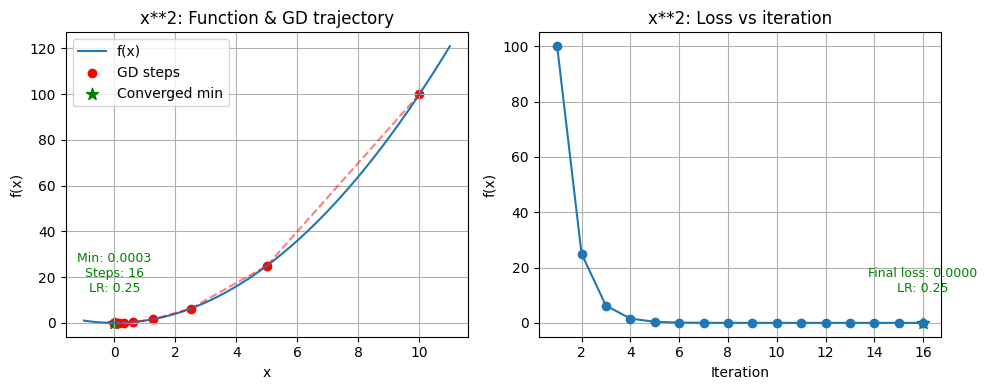

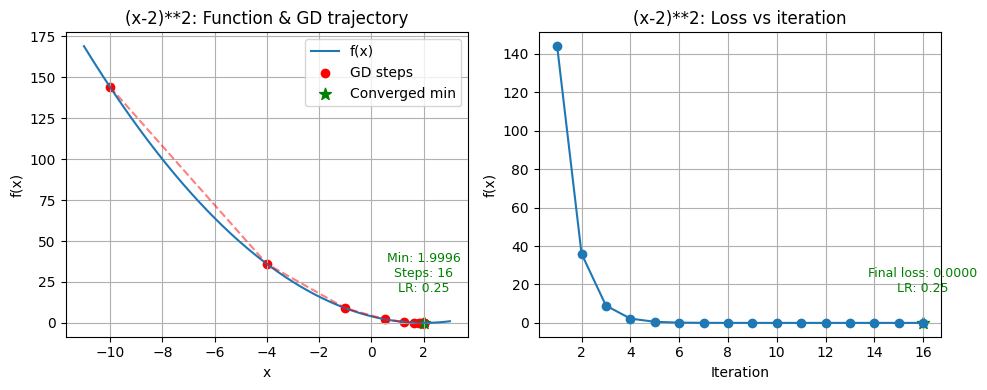

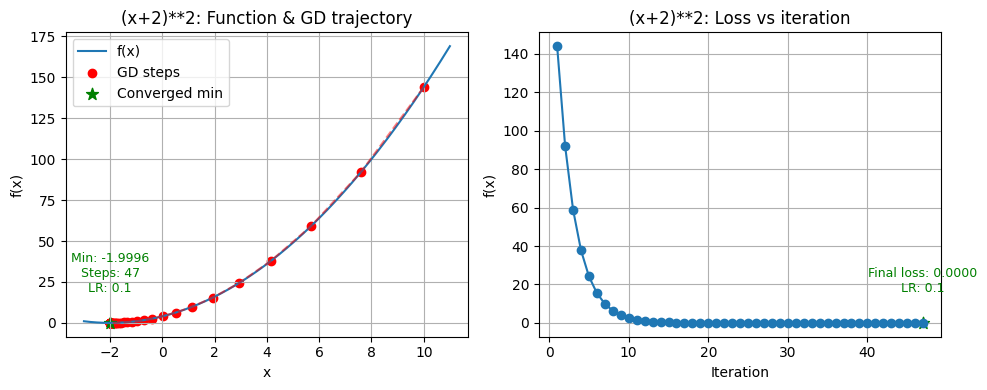

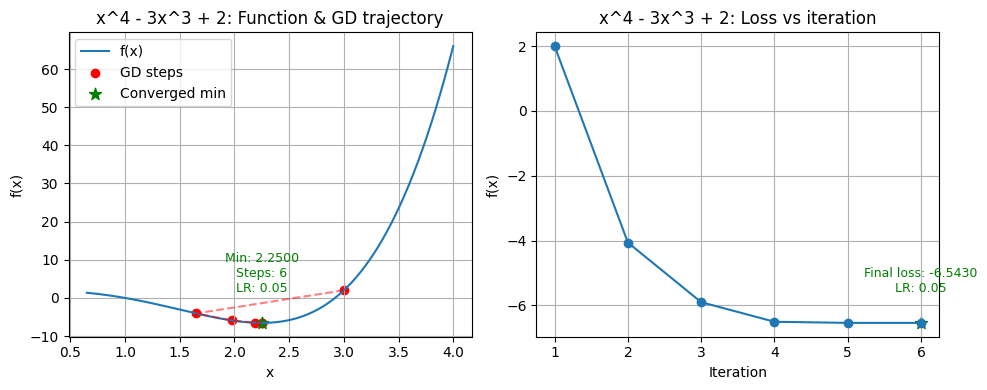

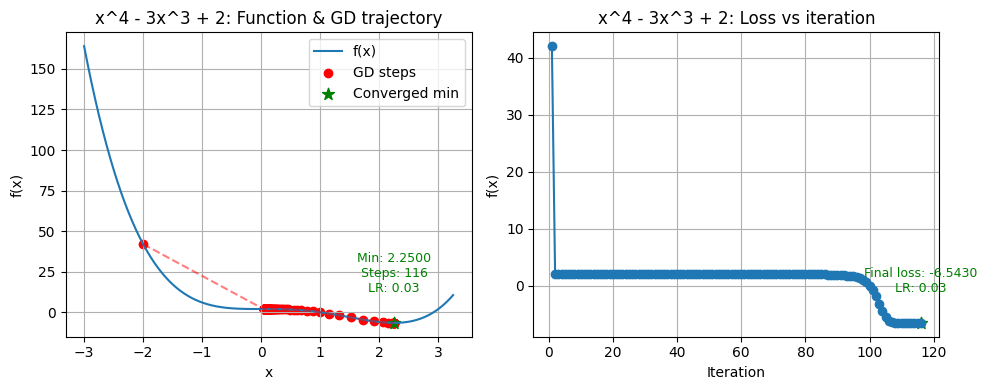

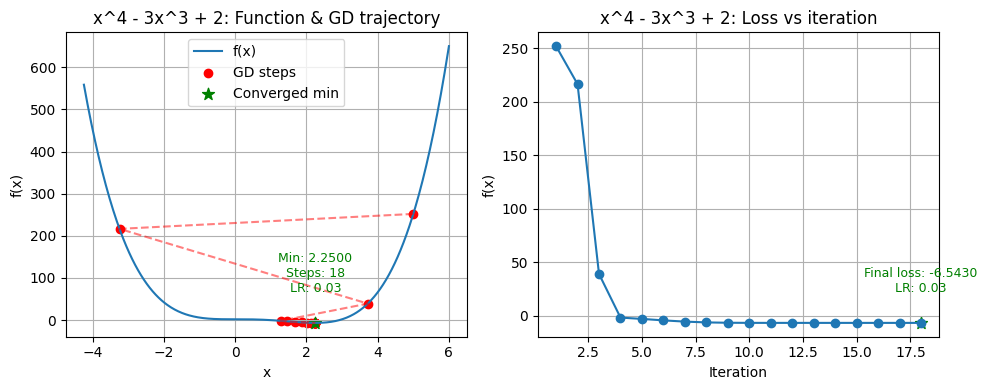

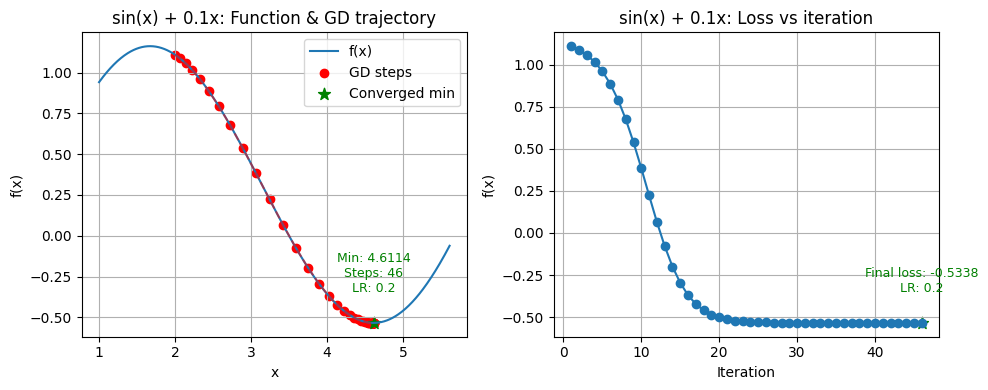

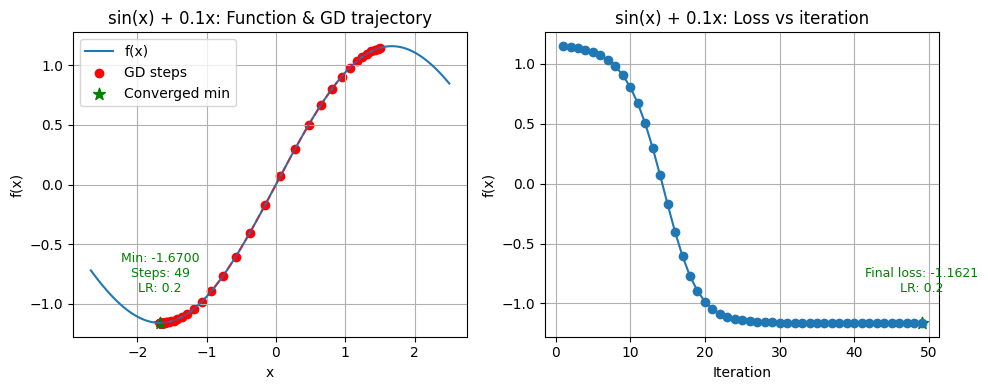

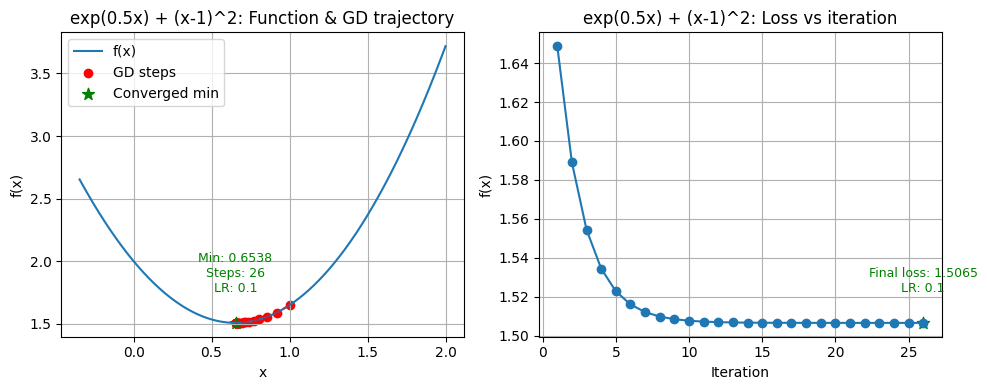

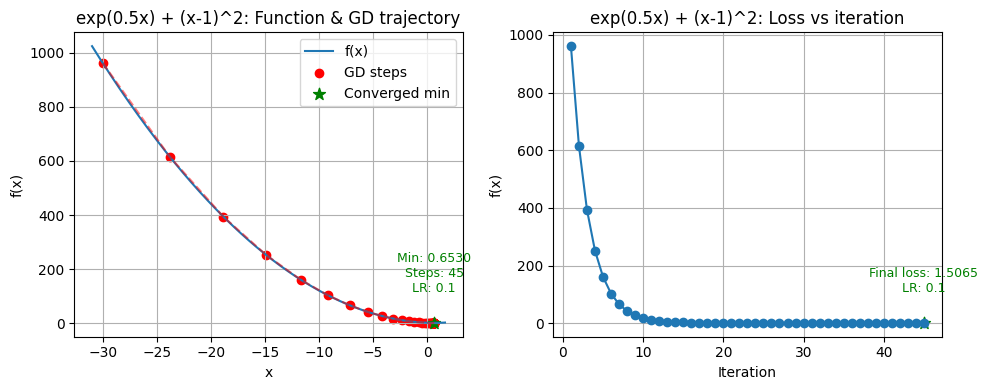

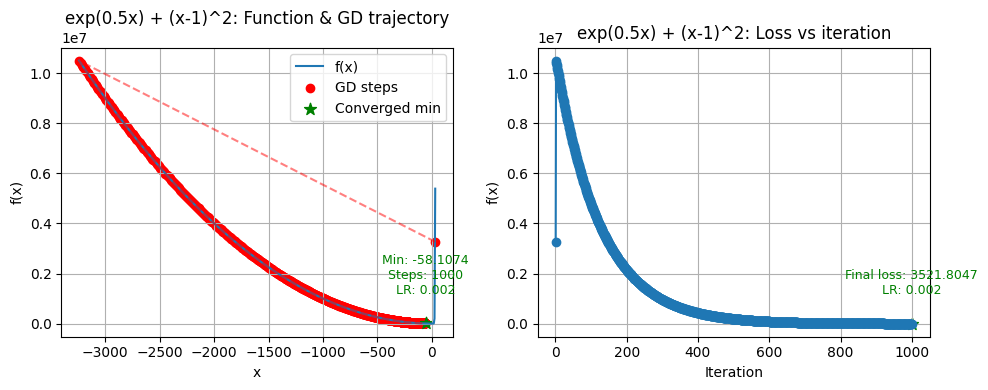

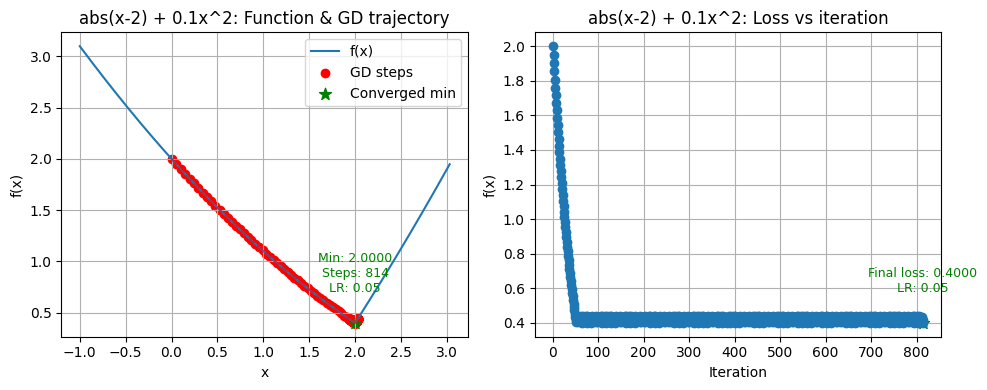

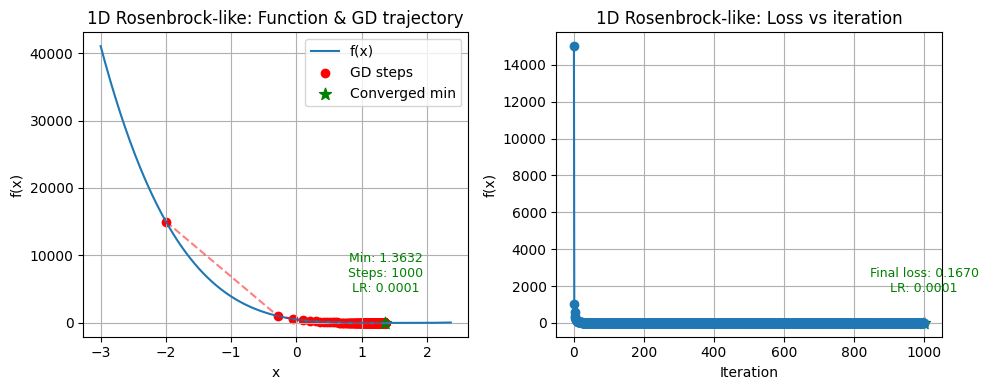

In [4]:
from mlpeople.visualization.optimization.gd import visualize_scalar_gd

# Test examples
visualize_scalar_gd(lambda x: x**2, label="x**2", lr=0.25)
visualize_scalar_gd(lambda x: (x-2)**2, label="(x-2)**2", init_w=-10, lr=0.25)
visualize_scalar_gd(lambda x: (x+2)**2, label="(x+2)**2", lr=0.1)
visualize_scalar_gd(lambda x: x**4 - 3*x**3 + 2, label="x^4 - 3x^3 + 2", init_w=3, lr=0.05)
visualize_scalar_gd(lambda x: x**4 - 3*x**3 + 2, label="x^4 - 3x^3 + 2", init_w=-2, lr=0.03)
visualize_scalar_gd(lambda x: x**4 - 3*x**3 + 2, label="x^4 - 3x^3 + 2", init_w=5, lr=0.03)
visualize_scalar_gd(lambda x: np.sin(x) + 0.1*x, label="sin(x) + 0.1x", init_w=2, lr=0.2)
visualize_scalar_gd(lambda x: np.sin(x) + 0.1*x, label="sin(x) + 0.1x", init_w=1.5, lr=0.2)
visualize_scalar_gd(lambda x: np.exp(0.5*x) + (x-1)**2, label="exp(0.5x) + (x-1)^2", init_w=1, lr=0.1)
visualize_scalar_gd(lambda x: np.exp(0.5*x) + (x-1)**2, label="exp(0.5x) + (x-1)^2", init_w=-30, lr=0.1)
visualize_scalar_gd(lambda x: np.exp(0.5*x) + (x-1)**2, label="exp(0.5x) + (x-1)^2", init_w=30, lr=0.002)
visualize_scalar_gd(lambda x: np.abs(x - 2) + 0.1*x**2, label="abs(x-2) + 0.1x^2", init_w=0, lr=0.05, epsilon=0.1)
visualize_scalar_gd(lambda x: (1 - x)**2 + 100*(x - 1.5)**4, label="1D Rosenbrock-like", init_w=-2, lr=0.0001, epsilon=0.1)


## Vector Example (linear regression)

### Example with specified W and simply calucalate y

In [5]:
import numpy as np
from mlpeople.math import add_bias_column

# Input data
X_raw = np.array([1,2,3,4,5])

# Targets
y = 2*X_raw+1

X = add_bias_column(X_raw)


# Loss function
def loss_fn(W):
    return np.mean((X @ W - y) ** 2)

# Optimize
W_opt = batch_gradient_descent(
    loss_fn,
    init_w=[0, 0],
    lr=0.01,
    epsilon=1e-6
)

print("Learned W:", W_opt.round(2))

Learned W: [0.99 2.  ]


### Example with noise

In [6]:
from mlpeople.models.linear import generate_linear_regression_data, fit_ols

true_coefs = [2.0, -1.5, 0.5]
true_intercept = 1.0

# Generate data
X_raw, y, beta_true = generate_linear_regression_data(
    n=100, p=3, coefs=true_coefs, intercept=true_intercept, sigma=0.5, seed=42
)

X = add_bias_column(X_raw)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=False)

# Gradient Optimize
lr = 0.05
epsilon=1e-6
W_opt, history = batch_gradient_descent(
    loss_fn,
    init_w=[0, 0, 0, 0],
    lr=lr,
    epsilon=epsilon,
    return_history=True
)

print("True beta:", beta_true)
print("Estimated OLS:", beta_hat.round(2))
print("Learned Gradient Optimize:", W_opt.round(2))
print(f"Gradient Optimize steps: {len(history)} with learn rate: {lr}, epsilon: {epsilon}")


True beta: [ 1.   2.  -1.5  0.5]
Estimated OLS: [ 1.06  1.96 -1.52  0.45]
Learned Gradient Optimize: [ 1.06  1.96 -1.52  0.45]
Gradient Optimize steps: 224 with learn rate: 0.05, epsilon: 1e-06


### Visualizations

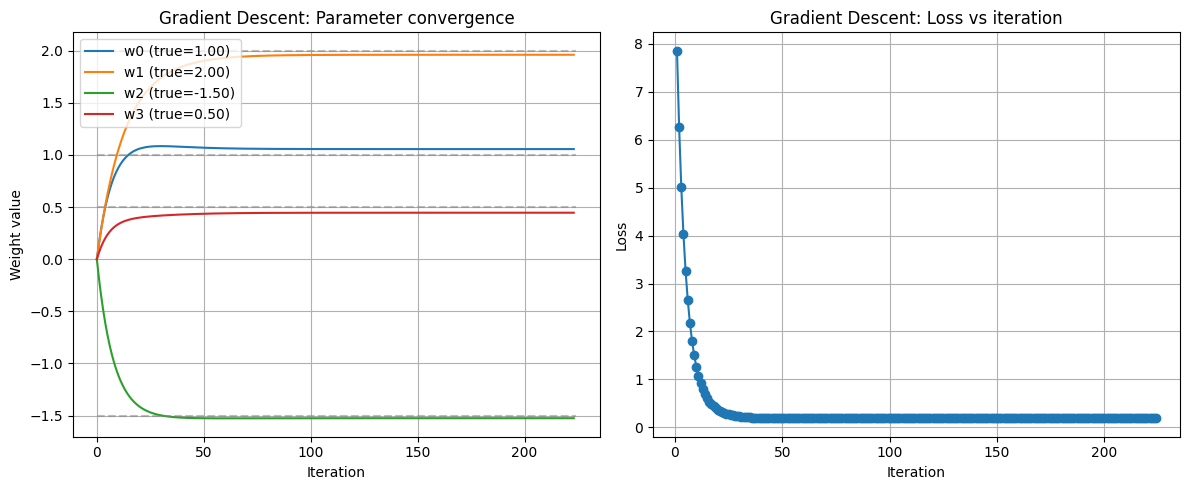

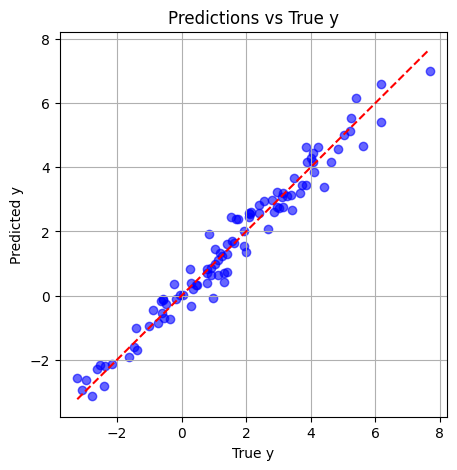

In [7]:
from mlpeople.optimization.experiments import visualize_linear_regression_gd

visualize_linear_regression_gd(X, y, beta_true=np.append(true_intercept, true_coefs), history=history, plot_predictions=True)

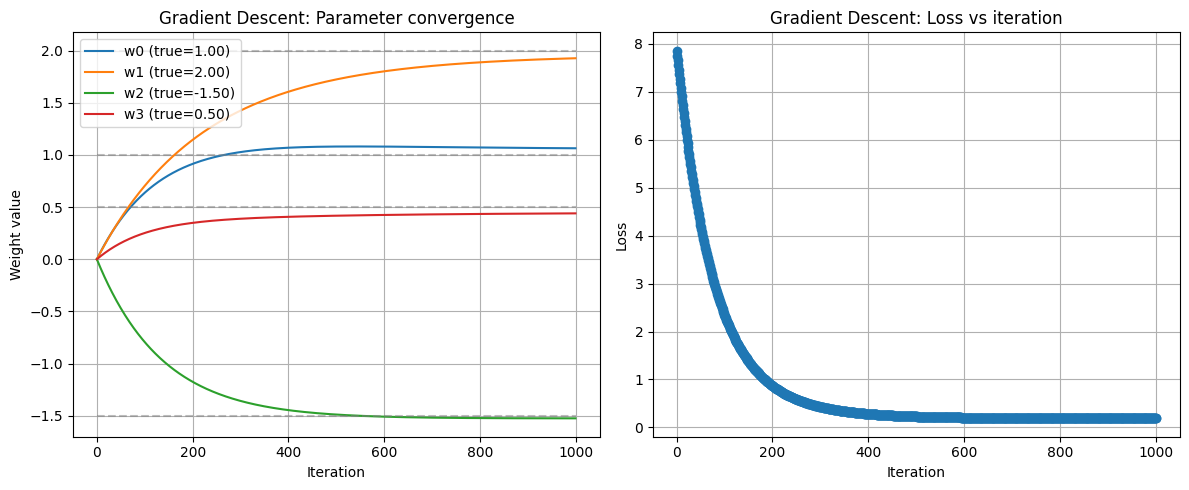

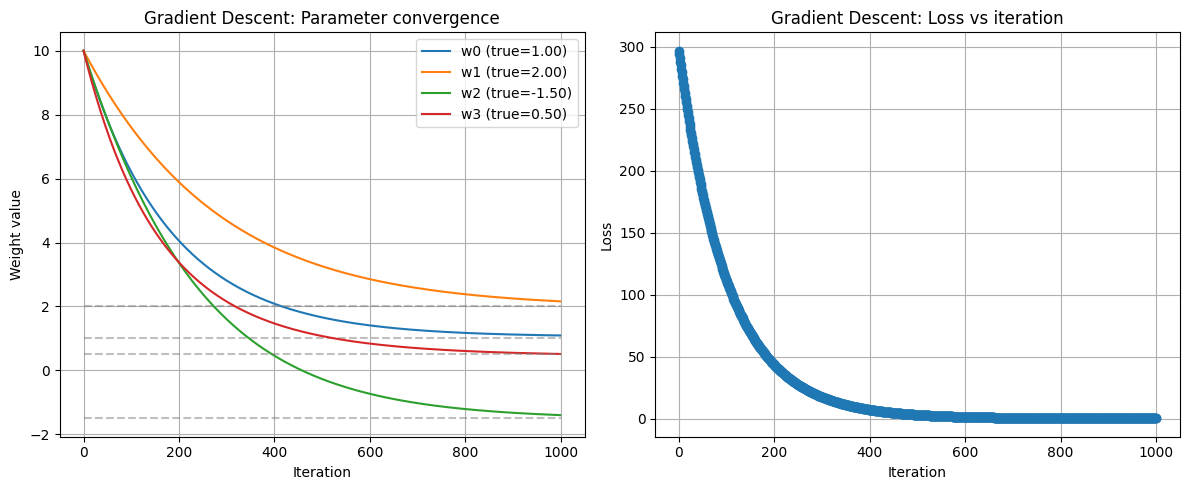

In [8]:
from mlpeople.optimization.experiments import run_gd_and_visualize

# Run gradient descent + visualization
run_gd_and_visualize(
    X, y,
    loss_fn=loss_fn,
    beta_true=np.append(true_intercept, true_coefs),
    init_w=[0, 0, 0, 0],
    lr=0.003,
    epsilon=1e-6,
    plot_predictions=False
)

run_gd_and_visualize(
    X, y,
    loss_fn=loss_fn,
    beta_true=np.append(true_intercept, true_coefs),
    init_w=[10, 10, 10, 10],
    lr=0.003,
    epsilon=1e-6,
    plot_predictions=False
);

## Stochastic Gradient Descent

In [9]:
import numpy as np
from mlpeople.math import stochastic_gradient_descent


### Simple Sample

In [10]:
# Raw data
X_raw = np.array([1, 2, 3, 4, 5])
y = 2 * X_raw + 1

# Add bias
X = add_bias_column(X_raw)

def mae_loss(W, X, y):
    return np.mean(np.abs(X @ W - y))

def rmse_loss(W, Xb, yb):
            preds = Xb @ W
            return np.mean((preds - yb) ** 2)

# SGD
W_sgd, history = stochastic_gradient_descent(
    X=X,
    y=y,
    init_w=[0, 0],
    lr=0.01,
    epochs=500,
    batch_size=1,
    epsilon=0.0001,
    return_history=True,
    # loss_fn=mae_loss
)

print("Learned weights:", np.round(W_sgd, 2))
len(history)


Learned weights: [0.98 2.  ]


179

### Loss per batch vs loss per epoch

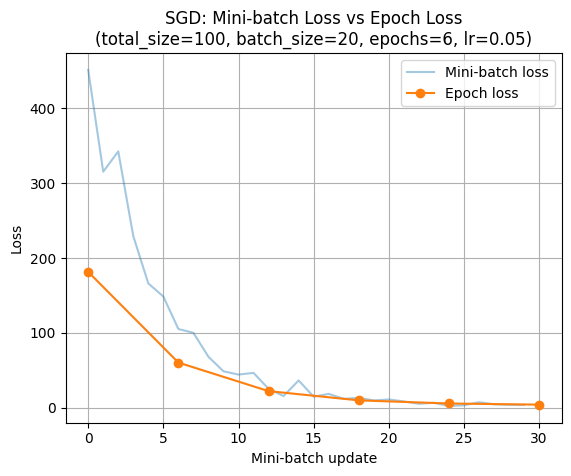

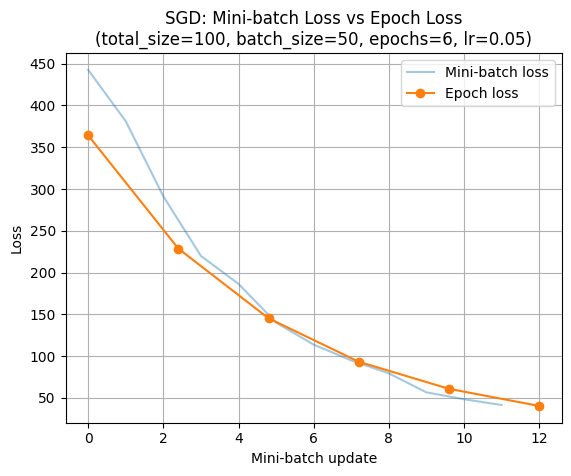

In [11]:
from mlpeople.visualization.optimization.gd import plot_sgd_batch_vs_epoch
from mlpeople.optimization.experiments import run_and_plot_sgd_batch_vs_epoch

run_and_plot_sgd_batch_vs_epoch()
run_and_plot_sgd_batch_vs_epoch(batch_size=50);     # near-batch


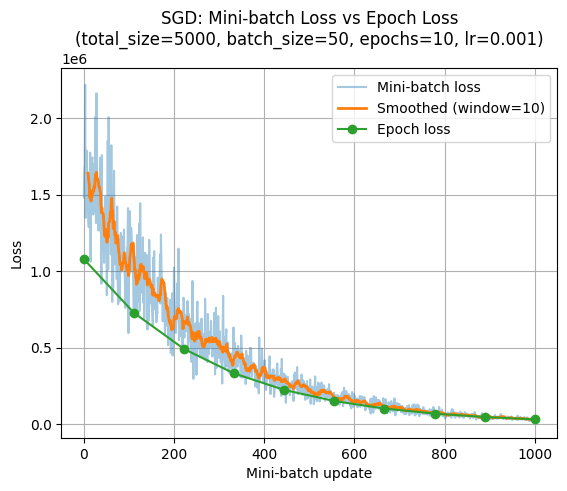

In [12]:
run_and_plot_sgd_batch_vs_epoch(
    true_coefs=[100, -200, 50, 400, -150, 300, 1000],
    true_intercept=-550,
    sigma=20,               # more noise
    total_size=5000,        # large dataset
    batch_size=50,          # mini-batch SGD
    epochs=10,              # few epochs to see struggle
    lr=0.001,               # low learning rate to see more noise per batch,
    smooth=True
);


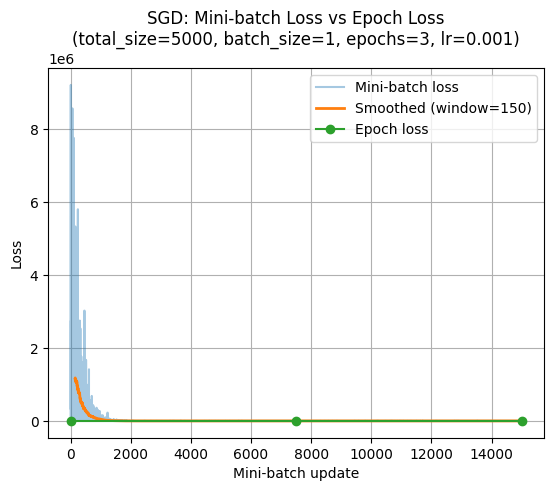

In [13]:
run_and_plot_sgd_batch_vs_epoch(
    true_coefs=[100, -200, 50, 400, -150, 300, 1000],
    true_intercept=-550,
    sigma=20,               # more noise
    total_size=5000,        # large dataset
    batch_size=1,           # pure SGD
    epochs=3,               # it basically converge in 1 epoch
    lr=0.001,               # low learning rate to see more noise per batch,
    smooth=True
);


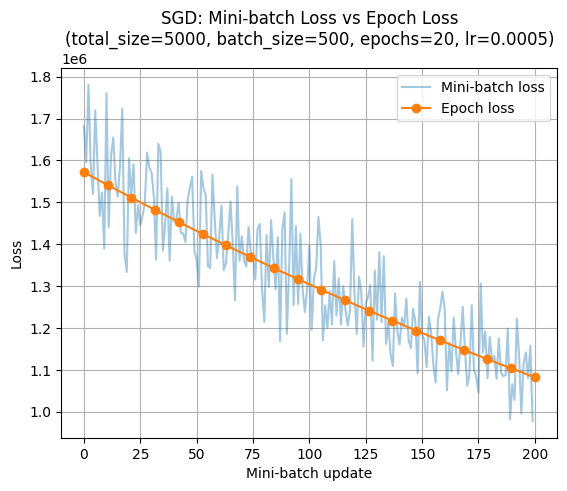

In [14]:
run_and_plot_sgd_batch_vs_epoch(
    true_coefs=[100, -200, 50, 400, -150, 300, 1000],
    true_intercept=-550,
    sigma=50,               # even more noise
    total_size=5000,        # large dataset
    batch_size=500,         # big mini-batch SGD
    epochs=20,              # should not be enough epochs to converge with this lr
    lr=0.0005,              # very low learning rate to slow convergence
    # smooth=True
);

## GD vs. SGD

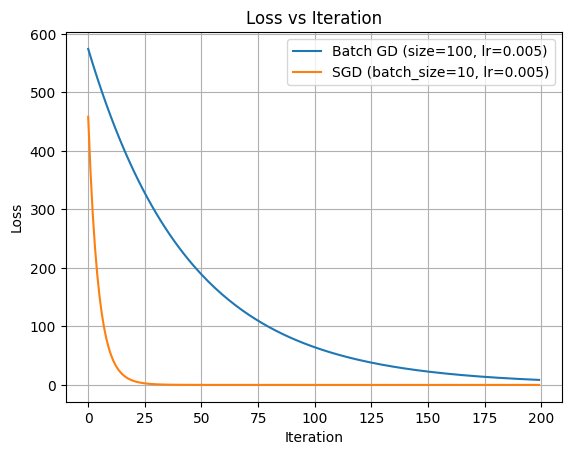

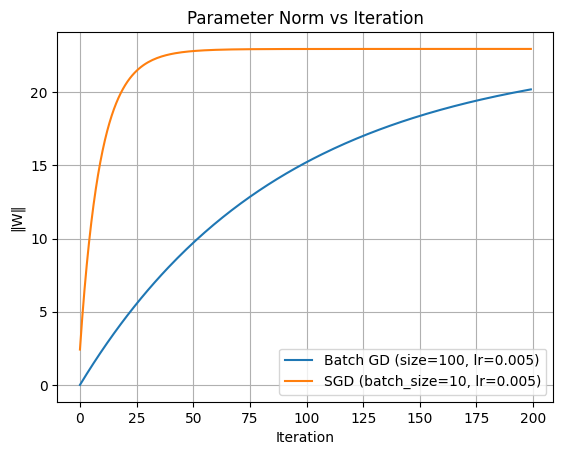

In [15]:
from mlpeople.optimization.experiments import compare_and_visualize_gd, run_and_compare_gd

W_batch, W_sgd, beta_true = run_and_compare_gd();

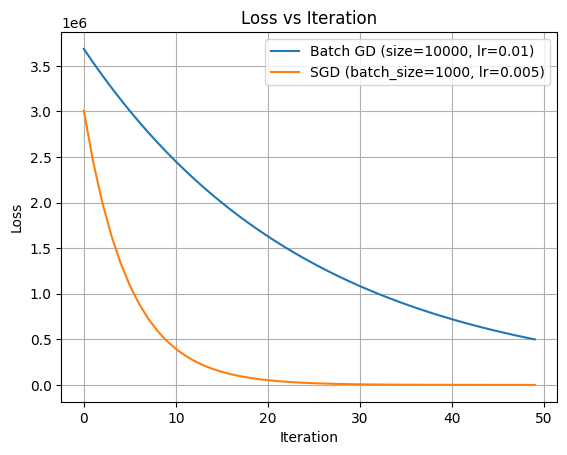

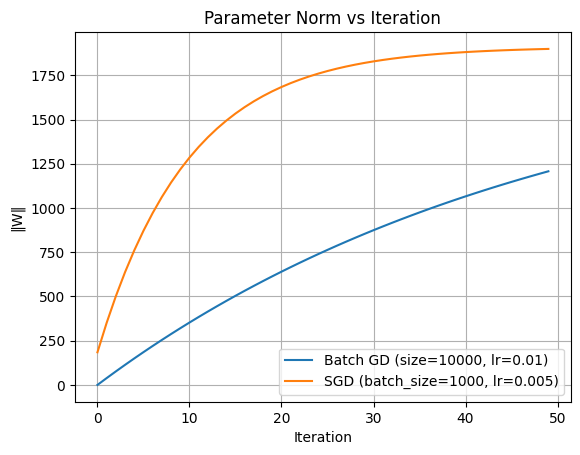

In [16]:
W_batch, W_sgd, beta_true = run_and_compare_gd(
    true_coefs=[50, -100, 200, 888, 999, -777],
    true_intercept=-1100,
    total_size=10000,
    sigma=10,
    lr_batch=0.01,
    lr_sgd=0.005,
    epochs=50,
    batch_size=1000
)
